In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [2]:
n = 30000

vec_alpha = np.array([0.1, 0.5, 0.7])

vec_Vk = np.linspace(-80, -50, n + 1)

df_V_distr = pd.DataFrame({'Vk':vec_Vk})
df_V_distr_ad = pd.DataFrame({'Vk':vec_Vk})

In [3]:
for alpha_val in vec_alpha:
	print(alpha_val)
	model_type = mt.MFNMDA(alpha_val = alpha_val,
				EL_val = -60,
				EA_val = 0,
				EN_val = 0,
				EI_val = -80,
				nuA_val = 0.005,
				nuN_val = 0.005,
				nuI_val = 0.005,
				wA_val = 0.1,
				wN_val = 0.1,
				wI_val = 0.4,
				tauA_val = 1,
				tauN_val = 100,
				tauI_val = 10,
				KA_val = 400,
				KN_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2,
				beta_val = 0.062,
				gamma_val = 3.57,
				n_Mg_val = 1
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, True)

	nu = FP_model.calculate_firing_rate(vec_Vk)

	P = FP_model.integrate_p0(vec_Vk)*nu
	df_V_distr[alpha_val] = P


0.1


/home/marcelo/Workspace/MF_Model/Modules/mf_models.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  elif((-0.01 <= 1/Bk <= 0.8) or (-9.9 <= 1/Hk <= 0.2)):


KeyboardInterrupt: 

In [ ]:
for alpha_val in vec_alpha:
	print(alpha_val)
	model_type = mt.MFNMDA(alpha_val = alpha_val,
				EL_val = -60,
				EA_val = 0,
				EN_val = 0,
				EI_val = -80,
				nuA_val = 0.005,
				nuN_val = 0.005,
				nuI_val = 0.005,
				wA_val = 0.5,
				wN_val = 0.5,
				wI_val = 10,
				tauA_val = 1,
				tauN_val = 100,
				tauI_val = 10,
				KA_val = 400,
				KN_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2,
				beta_val = 0.062,
				gamma_val = 3.57,
				n_Mg_val = 1
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, True)

	nu = FP_model.calculate_firing_rate(vec_Vk)

	P = FP_model.integrate_p0(vec_Vk)*nu
	df_V_distr_ad[alpha_val] = P


0.1


/home/marcelo/Workspace/MF_Model/Modules/mf_models.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  elif((-0.01 <= 1/Bk <= 0.8) or (-9.9 <= 1/Hk <= 0.2)):


0.5
0.7


In [ ]:
V_data_path = "../../Data/V_data/"
df_sim = pd.read_csv(f"{V_data_path}V_distr_NMDA.dat")
df_sim_wI = pd.read_csv(f"{V_data_path}V_distr_NMDA_wI.dat")

(array([1.04638608e-03, 8.51994691e-04, 1.16547270e-03, 4.29762584e-03,
        6.04627271e-03, 7.85971670e-03, 1.06617547e-02, 1.92333642e-02,
        2.71035886e-02, 3.63179155e-02, 4.34753714e-02, 5.76072752e-02,
        6.13786432e-02, 7.34405414e-02, 8.90592765e-02, 1.05468712e-01,
        1.15033294e-01, 1.32248315e-01, 1.45837324e-01, 1.52448382e-01,
        1.86400327e-01, 2.01369339e-01, 2.16958303e-01, 2.13267493e-01,
        2.17690335e-01, 2.30404583e-01, 2.49167730e-01, 2.69094599e-01,
        2.72706601e-01, 2.84978652e-01, 2.73314293e-01, 2.88412024e-01,
        3.06255753e-01, 3.10986819e-01, 3.19232691e-01, 2.98706887e-01,
        3.00479176e-01, 2.95741980e-01, 2.88720248e-01, 2.83386744e-01,
        2.85180048e-01, 2.93711379e-01, 2.87854243e-01, 2.81481358e-01,
        2.75277471e-01, 2.70602445e-01, 2.58979241e-01, 2.61282166e-01,
        2.55443420e-01, 2.45377098e-01, 2.38013867e-01, 2.37780072e-01,
        2.32211022e-01, 2.20653490e-01, 2.17909244e-01, 2.068219

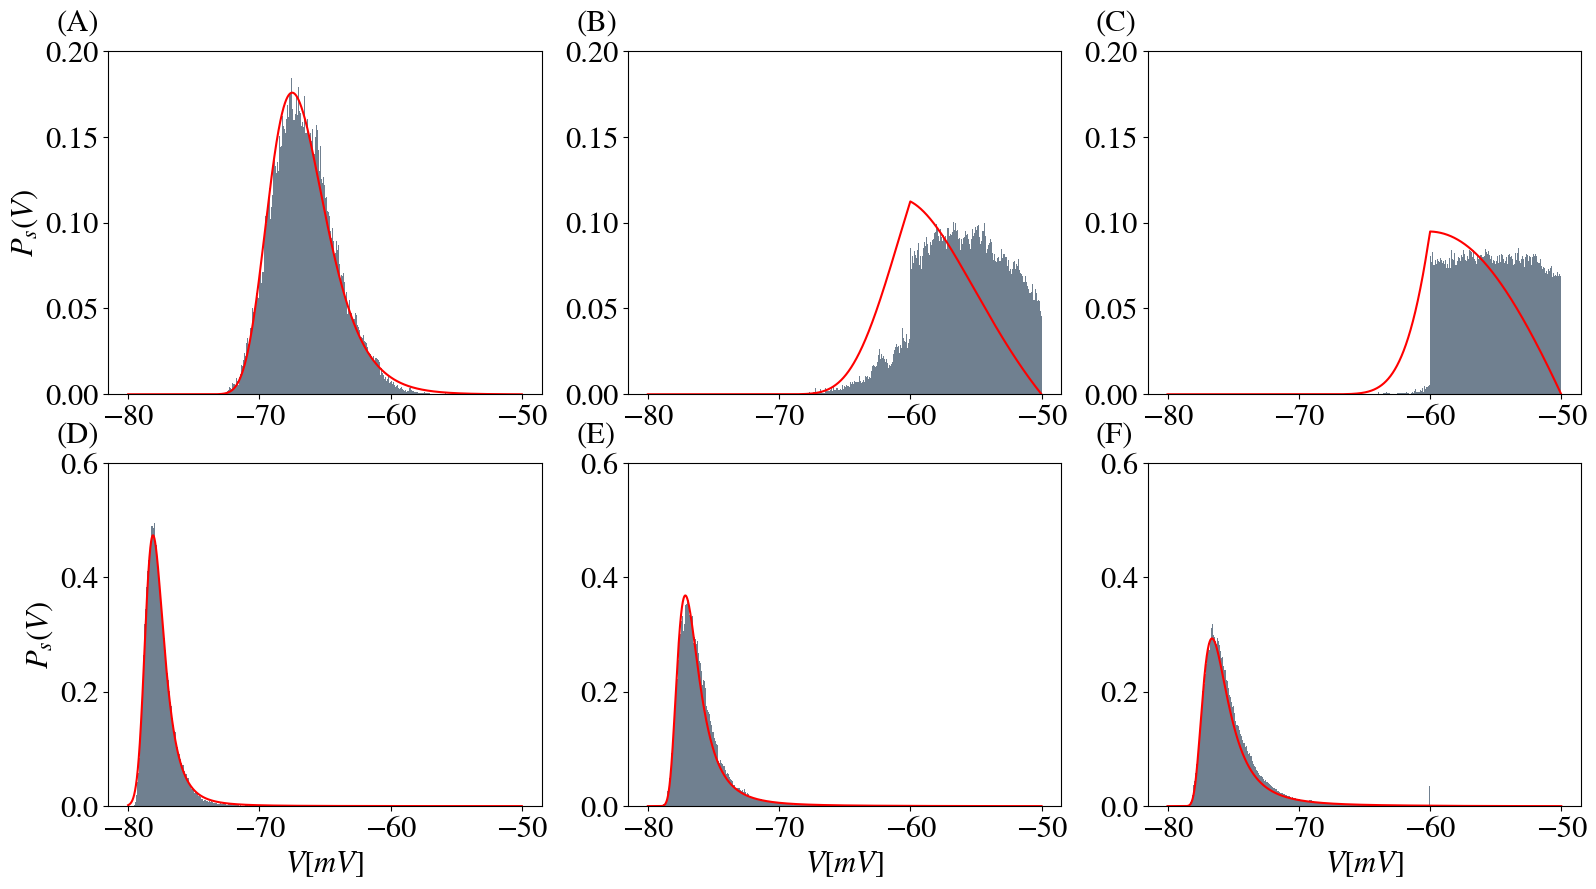

In [19]:
vec_alpha_label = np.array(['0.1', '0.5', '0.7'])
fig, axs = plt.subplots(2, 3, figsize=(19,10), dpi=100, squeeze=False)

axs[0][0].annotate("(A)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[0][2].annotate("(C)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][0].annotate("(D)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][1].annotate("(E)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][2].annotate("(F)", xy=(-0.12, 1.06), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$V[mV]$')
axs[1][1].set_xlabel(r'$V[mV]$')
axs[1][2].set_xlabel(r'$V[mV]$')
axs[0][0].set_ylabel(r'$P_s(V)$')
axs[1][0].set_ylabel(r'$P_s(V)$')
axs[0][0].set_ylim(0,0.2)
axs[0][1].set_ylim(0,0.2)
axs[0][2].set_ylim(0,0.2)
axs[1][0].set_ylim(0,0.6)
axs[1][1].set_ylim(0,0.6)
axs[1][2].set_ylim(0,0.6)

axs[0][0].plot(df_V_distr['Vk'], df_V_distr[vec_alpha[0]], 'r-')
axs[0][0].hist(df_sim[vec_alpha_label[0]], bins=1000, density=True, color='slategray')

axs[0][1].plot(df_V_distr['Vk'], df_V_distr[vec_alpha[1]], 'r-')
axs[0][1].hist(df_sim[vec_alpha_label[1]], bins=1000, density=True, color='slategray')

axs[0][2].plot(df_V_distr['Vk'], df_V_distr[vec_alpha[2]], 'r-')
axs[0][2].hist(df_sim[vec_alpha_label[2]], bins=1000, density=True, color='slategray')

axs[1][0].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_alpha[0]], 'r-')
axs[1][0].hist(df_sim_wI[vec_alpha_label[0]], bins=2000, density=True, color='slategray')

axs[1][1].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_alpha[1]], 'r-')
axs[1][1].hist(df_sim_wI[vec_alpha_label[1]], bins=2000, density=True, color='slategray')

axs[1][2].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_alpha[2]], 'r-')
axs[1][2].hist(df_sim_wI[vec_alpha_label[2]], bins=500, density=True, color='slategray')
# fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})